### Chapter 06 비지도 학습 ▶️비슷한 과일끼리 모으자!
#### 06-2 k-평균 ▶️k-평균 알고리즘 작동 방식을 이해하고 비지도 학습 모델 만들기
----

#### 1. sklearn의 KMeans
- KMeans는 랜덤하게 클러스터 중심을 선택하고, 점차 가장 가까운 샘플의 중심으로 이동하는 알고리즘
- 매개변수는 클러스터 갯수를 지정하는 n_clusters 
- 비지도 학습이므로 fit() 메서드에서 target 데이터를 사용하지 않음 
- clsutering 결고는 labels_에 저장됨, labels_ 배열의 길이는 샘플갯수와 같음 (각 샘플이 어떤 클러스터에 해당되는지 표시)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## download the images from website 
#!pip install wget 
import wget 
wget.download('https://bit.ly/fruits_300_data')
fruits = np.load('fruits_300_data')

100% [..........................................................................] 3000128 / 3000128

In [2]:
fruits.shape

(300, 100, 100)

In [3]:
## 학습을 위해 3차원 --> 2차원 array로 변환 
fruits_2d = fruits.reshape(-1, 100*100)
print( fruits_2d.shape )
fruits_2d[:5]

(300, 10000)


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [4]:
## KMeans algorism 학습 - 3개의 클러스터 지정 
from sklearn.cluster import KMeans 
km = KMeans(n_clusters = 3, random_state = 42) 
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [5]:
## 학습된 결과는 labels_에 저장된다. 
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
## labels_ 0, 1, 2 각각은 몇개인가? 
np.unique(km.labels_, return_counts = True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [7]:
## 이미지 출력을 위한 함수 제작 
## 3차원 배열을 입력받아, 가로 10개의 이미지 출력. 샘플 갯수에 따라 rows/cols 갯수를 계산하여 figsize 지정 

def draw_fruits(arr, ratio = 0.5): # ratio로 figsize 조정 
    n = len(arr)    # n은 샘플 개수입니다
    
    rows = int(np.ceil(n/10)) # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    cols = n if rows < 2 else 10 # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    # squeeze 매개변수 기본값은 True. 만약 subplots(1, 1)로 호출하면 이 함수가 반환되는 axs 배열은 (10, 1)이 아니라 (10,)이 됩니다.
    # 즉 원소 개수가 1인 차원을 자동으로 압축하여 차원을 축소시킵니다.
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    
    plt.show()    

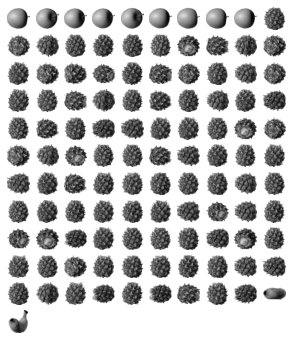

In [8]:
draw_fruits(fruits[km.labels_ == 0])

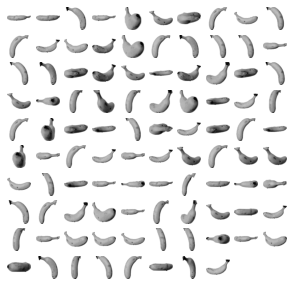

In [9]:
draw_fruits(fruits[km.labels_ == 1])

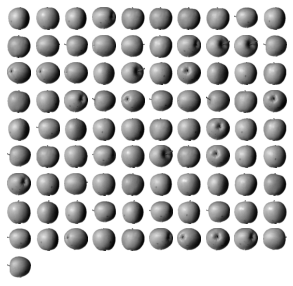

In [10]:
draw_fruits(fruits[km.labels_ == 2])

- km.lables_가 0인 경우 정확히 분류해내지 못하였음 
----

#### 2. 각 클러스터의 평균 : cluster_centers_ 

In [11]:
## 훈련된 KMeans 모델을 통해, 데이터에서 특정값이 어떤 과일인지 알아보자 
print( fruits_2d.shape )
fruits_2d

(300, 10000)


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [12]:
## cluster = 0, 1, 2 : pineapple, bnanan, apple
print('0번째 과일은 = ' , km.predict(fruits_2d[0:1]) )
print('100번째 과일은 = ' ,km.predict(fruits_2d[100:101]) )
print('200번째 과일은 = ' ,km.predict(fruits_2d[200:201]) )

0번째 과일은 =  [2]
100번째 과일은 =  [0]
200번째 과일은 =  [1]


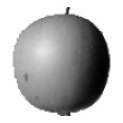

In [13]:
draw_fruits(fruits[0:1], ratio = 2)

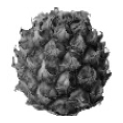

In [14]:
draw_fruits(fruits[100:101], ratio = 2)

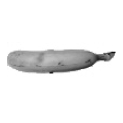

In [15]:
draw_fruits(fruits[200:201], ratio = 2)

In [16]:
## KMeans 알고리즘이 학습을 위해 반복한 횟수 : n_iter_
km.n_iter_

4

----
#### 3. 최적의 반복횟수 k 찾기 
- KMeans 알고리즈음 클러스터의 갯수(n_clusters)를 지정해줘야 함 
- 앞서 예제에서는 데이터셋이 3종류의 과일로 구성되었다는 것을 알고 있었으나, 실전에서는 그러한 것을 알수 없는 경우가 대부분 
- elbow 방법 : 클러스터 갯수를 조정해가면서 최적의 k값을 찾는 방식 

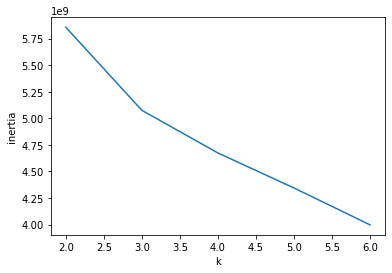

In [17]:
## k를 2~6까지 변경하면서, inertia 값(각 클러스터 중심과 관측치간 오차 제곱합)을 살펴본다. 
inertia = []

for k in range(2, 7): 
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

- k = 3인 지점에서 inertia값이 확연하게 감소함 (군집화가 잘 됨) 